In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/sallen/results/MEOPAR/fluxes_elise_2/'
ts=dt.datetime(2015,1,1)
te=dt.datetime(2015,12,31)

In [4]:
ftype='dian_T'
paths=glob.glob(os.path.join(idir,'*','*'+ftype+'*'))

In [5]:
fPlist=et.index_model_files_flex(idir,'dian_T','1d','nowcast',ts,te)
fDlist=et.index_model_files_flex(idir,'dia1_T','1d','nowcast',ts,te)
fD2list=et.index_model_files_flex(idir,'dia2_T','1d','nowcast',ts,te)
fSlist=et.index_model_files_flex(idir,'snp_T','1d','nowcast',ts,te)
fRlist=et.index_model_files_flex(idir,'rad_T','1d','nowcast',ts,te)

In [6]:
ATFNO3Sum=list(); ATFNH4Sum=list(); ATFDONSum=list(); ATFPONSum=list(); ATFLIVSum=list();
BFXPONSum=list(); BFXDIATSum=list();
for i,r in fDlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:,:,:,:],3),2),1))
        ATFNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NH4'][:,:,:,:],3),2),1))
        ATFDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DON'][:,:,:,:],3),2),1))
        ATFPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_PON'][:,:,:,:],3),2),1))
        ATFLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_LIV'][:,:,:,:],3),2),1))
        BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*f.variables['BFX_PON'][:,:,:],2),1))
        BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*f.variables['BFX_DIAT'][:,:,:],2),1))
ATFNO3Sum=np.concatenate(ATFNO3Sum,axis=0)
ATFNH4Sum=np.concatenate(ATFNH4Sum,axis=0)
ATFDONSum=np.concatenate(ATFDONSum,axis=0)
ATFPONSum=np.concatenate(ATFPONSum,axis=0)
ATFLIVSum=np.concatenate(ATFLIVSum,axis=0)
BFXPONSum=np.concatenate(BFXPONSum,axis=0)
BFXDIATSum=np.concatenate(BFXDIATSum,axis=0)

In [7]:
PHSNO3Sum=list(); PHSNH4Sum=list(); PHSDONSum=list(); PHSPONSum=list(); PHSLIVSum=list();
SMSNO3Sum=list(); SMSNH4Sum=list(); SMSDONSum=list(); SMSPONSum=list(); SMSLIVSum=list();
for i,r in fD2list.iterrows():
    with nc.Dataset(r['paths']) as f:
        SMSNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_NO3'][:,:,:,:],3),2),1))
        SMSNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_NH4'][:,:,:,:],3),2),1))
        SMSDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_DON'][:,:,:,:],3),2),1))
        SMSPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_PON'][:,:,:,:],3),2),1))
        SMSLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_LIV'][:,:,:,:],3),2),1))
SMSNO3Sum=np.concatenate(SMSNO3Sum,axis=0)
SMSNH4Sum=np.concatenate(SMSNH4Sum,axis=0)
SMSDONSum=np.concatenate(SMSDONSum,axis=0)
SMSPONSum=np.concatenate(SMSPONSum,axis=0)
SMSLIVSum=np.concatenate(SMSLIVSum,axis=0)

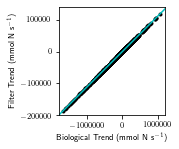

In [8]:
fig,ax=plt.subplots(1,1,figsize=(2.5,2))
ax.set_position((.3,.2,.65,.75))
ax.plot(SMSNO3Sum,ATFNO3Sum,'k.')
ax.plot(SMSNH4Sum,ATFNH4Sum,'k.')
ax.plot(SMSDONSum,ATFDONSum,'k.')
ax.plot(SMSPONSum+BFXPONSum,ATFPONSum,'k.')
ax.plot(SMSLIVSum+BFXDIATSum,ATFLIVSum,'k.')
ax.plot(np.arange(-2e6,3e6,1e6),0.1111*np.arange(-2e6,3e6,1e6),'c-',label='y = 0.11 x')
ax.set_xlabel('Biological Trend (mmol N s$^{-1}$)')
ax.set_ylabel('Filter Trend (mmol N s$^{-1}$)')
ax.set_xlim(-1.8e6,1.2e6)
ax.set_ylim(-2e5,1.4e5)
ax.set_aspect(9)
fig.savefig('ATFvsBioPlot.eps',dpi=200)